# Dijkstra's Algorithm

Dijkstra's Algorithm is a useful graph traversal algorithm developed by famed computer scientist Edsgar W. Dijkstra. In short, Dijkstra's algorithm is an algorithm that is used to find the shortest paths from the source vertex to different vertices in the graph. In order to do this, our function must take in the graph represented in the form of an adjacency list or matrix. Dijkstra's Algorithm will use the values in the list or the matrix to determine the shortest path between a source vertex and, in one manner of the implementation, every other vertex in the graph. Another common implementation of Dijkstra Algorithm is to determine the shortest path between a source vertex and an end vertex on the graph as opposed to every vertex. An application of using an end vertex is used in navigation systems.

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from helper import draw_graph, clear_marks

# Pseudocode

## Using an adjacency list
Here is the pseudcode for Dijkstra's Algorithm using an adjacency list.

```
function Dijkstra(Adjacency List, source):
    init distances for all nodes
        (0 for source / infinity for rest)
    init every node as unvisited
    
    while there are still unvisited nodes:
       get the unvisited node with the smallest distance
       mark it as visited
       for each unvisited neighbor of the min node:
           if the current distance of the neighbor is larger 
              than the distance of the min node +  the weight of the edge (min node, neighbor):
               set the the distance of the neighbor to the new distance
               mark min node as the previous node to the neighbor.

```


## Using an adjacency matrix

Here is the pseudocode for Dijkstra's Algorithm using an adjacency matrix.

```
function Dijkstra(Adjacency Matrix, source):
    distance at source vertex = 0
    
    for range of amount of vertices:
        for range of amount of vertices:
            if vertex was not visited and distance is less than infinity:
                save distance of specific vertex as minimum
                save the vertex           
        vertex saved is marked as visited
            
        for range of amount of vertices:
            if distance from saved vertex to current vertex is greater than zero and 
            vertex was not visited and 
            distance of current vertex > distance of minimum vertex + distance from saved vertex to current vertex:
                distance of current vertex = distance of minimum vertex + distance from saved vertex to current vertex

```

# Code for Dijkstra's Implementation

In [2]:
def dijkstra_list(G, source):
    nodes = np.array([{'node': n, 'dist': np.inf, 'prev': -1} for n in G])
    nodes[source]['dist'] = 0
    nodes[source]['prev'] = None
    visited = np.array([False] * len(G))
    while ~visited.all():
        closest = min(nodes[~visited], key=lambda n: n.get('dist')).get('node')

        visited[closest] = True
        for neighbor in G.adj[closest]:
            if not visited[neighbor]:

                new_distance = nodes[closest]['dist'] + G.edges[(closest, neighbor)].get('weight', 1)

                if nodes[neighbor]['dist'] > new_distance:
                    nodes[neighbor]['dist'] = new_distance
                    nodes[neighbor]['prev'] = closest
    return nodes



In [3]:
def dijkstra_matrix(A, source): 
        nodes = np.array([{'node': n, 'dist': np.inf, 'prev': -1} for n in range(len(A))]) 
        nodes[source]['dist'] = 0
        nodes[source]['prev'] = None
        visited = [False] * len(A)
   
        for i in range(len(A)): 
        
            min = np.inf 
   
            for j in range(len(A)): 
                if nodes[j]['dist'] < min and visited[j] == False: 
                    min = nodes[j]['dist'] 
                    min_index = j
            j = min_index
            visited[j] = True
   
            for k in range(len(A)): 
                if (A[j][k] > 0) and (visited[k] == False) and (nodes[k]['dist'] > nodes[j]['dist'] + A[j][k]): 
                    nodes[k]['dist'] = nodes[j]['dist'] + A[j][k]
                    nodes[k]['prev'] = j
        return nodes

In [4]:
def shortest_path(dijkstra_paths, target):
    """
    Returns the shortest path from the source node
    to the specified target node.
    """
    src = [dijkstra_path['node'] for dijkstra_path in dijkstra_paths if dijkstra_path['prev'] is None][0]
    original_target = target
    path = []
    while target != -1 and target is not None:
        path.append(target)
        target = dijkstra_paths[target]['prev']
    if target == -1:
        return src, original_target, []
    return src, original_target, path[::-1]

def print_path(src, target, shortest_path):
    if not shortest_path:
        print(f'No path from {src} to {target}')
        return
    for node in shortest_path[:-1]:
        print(node, '-->', end=' ')
    print(shortest_path[-1])

def dijsktra_traversal_table(dijkstra_paths):                 
    print("Vertex\t Weight  Previous ") 
    print("-------------------------")
    for node in dijkstra_paths: 
        print(node['node'], "\t", node['dist'], "\t", node['prev']) 

In [9]:
shortest_paths = dijkstra_list(G, 5)
print(shortest_paths)
src, target, path = shortest_path(shortest_paths, 3)

print_path(src, target, path)


[{'node': 0, 'dist': 2, 'prev': 8} {'node': 1, 'dist': 3, 'prev': 0}
 {'node': 2, 'dist': 3, 'prev': 9} {'node': 3, 'dist': 1, 'prev': 5}
 {'node': 4, 'dist': 2, 'prev': 3} {'node': 5, 'dist': 0, 'prev': None}
 {'node': 6, 'dist': 1, 'prev': 5} {'node': 7, 'dist': 3, 'prev': 9}
 {'node': 8, 'dist': 1, 'prev': 5} {'node': 9, 'dist': 2, 'prev': 8}]
5 --> 3


## Code for Dijkstra's Algorithm

The purpose of Dijkstra's Algorithm is to find the shortest path to any vertex in a graph from a start vertex. To determine what would classify as the shortest path from a source vertex to any other vertex, each edge is given a weight value. Using this, Dijkstra's Algorithm finds all the different paths from source vertex to a certain vertex on the graph and compares the added up weight values from the edges along the path. The path with the smallest value from the added weights is considered the shortest path. This is done to every other vertex as well, giving a shortest path from a source vertex to every other vertex in a graph.

There are two implementations of Dijkstra using different graph representations as input parameters. One variation involves passing in an adjacency list as a parameter. An adjacency list represents a graph by creating a list of sets of vertices where a pair indicates an edge between those two vertices. When a graph is directed, the ordering of the paired vertices matter. In another variation of the algorithm, we pass in an adjacency matrix as parameter instead of an adjacency list. An adjacency matrix is used to store the weights of an edge between two vertices. Each element within the matrix tells us whether 2 vertices are adjacent and the value given as the element is the weight. If 2 vertices are NOT adjacent then the value stored as the element is 0. We also pass in the source vertex for both implementations of the algorithm.

## Undirected Graph

Dijkstra's algorithm in the most simplest form can be used to find the shortest path within an undirected graph. In this undirected graph, weights have not been specified. Since that is the case, if two vertices have an edge between them then the weight value will automatically be initalized to 1.0.  

EdgeView([(0, 1), (0, 4), (0, 7), (0, 8), (2, 3), (2, 4), (2, 5), (2, 8), (2, 9), (3, 4), (4, 8), (4, 9), (5, 7), (6, 9), (7, 8), (7, 9), (8, 9)])

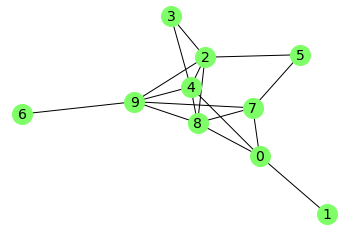

In [12]:
# for unweighted we consider all 
# edges to have a weight of 1.
G = nx.erdos_renyi_graph(10, 0.3)
draw_graph(G)
G.edges

Below is the adjacency matrix for the graph. As one can see, this matrix is symmetrical along the diagonal. This is because the graph is undirected and if vertex A has a path to vertex B then therefore vertex B has a path to vertex A as well.

In [7]:
A = nx.to_numpy_array(G)
A

array([[0., 1., 1., 0., 1., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 0., 1., 1.],
       [1., 0., 1., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.]])

### Results

Here, we pass in the graph we created along with the adjacency matrix of it. We also pass in our source vertex which in this case will be the 0 vertex.

In [8]:
dijkstra_matrix(A, 0)

array([{'node': 0, 'dist': 0, 'prev': None},
       {'node': 1, 'dist': 1.0, 'prev': 0},
       {'node': 2, 'dist': 1.0, 'prev': 0},
       {'node': 3, 'dist': 3.0, 'prev': 5},
       {'node': 4, 'dist': 1.0, 'prev': 0},
       {'node': 5, 'dist': 2.0, 'prev': 2},
       {'node': 6, 'dist': 2.0, 'prev': 2},
       {'node': 7, 'dist': 2.0, 'prev': 2},
       {'node': 8, 'dist': 1.0, 'prev': 0},
       {'node': 9, 'dist': 2.0, 'prev': 4}], dtype=object)

## Directed Graph

Here is Dijkstra's Algorithm implemented on a directed graph with uninitialized weights. Since direction is important here, if the source vertex cannot reach a certain vertex within the graph, *inf* (i.e. infinity) will be printed as the shortest path.

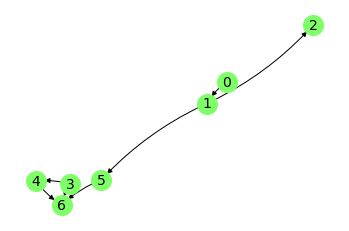

In [6]:
G = nx.DiGraph()
G.add_edge(0, 1)
G.add_edge(1, 2)
G.add_edge(3, 4)
G.add_edge(1, 5)
G.add_edge(3, 6)
G.add_edge(4, 6)
G.add_edge(5, 6)
draw_graph(G)

In [10]:
A = nx.to_numpy_array(G)
print(A)

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0.]]


In [11]:
shortest_paths = dijkstra_matrix(A, 5)

src, target, path = shortest_path(shortest_paths, 3)

print_path(src, target, path)

No path from 5 to 3


Here is the adjacency matrix. This is NOT symmetrical because the graph is directed.

### Results

In [12]:
dijkstra_matrix(A, 0)

array([{'node': 0, 'dist': 0, 'prev': None},
       {'node': 1, 'dist': 1.0, 'prev': 0},
       {'node': 2, 'dist': 2.0, 'prev': 1},
       {'node': 3, 'dist': inf, 'prev': -1},
       {'node': 4, 'dist': inf, 'prev': -1},
       {'node': 5, 'dist': 2.0, 'prev': 1},
       {'node': 6, 'dist': 3.0, 'prev': 5}], dtype=object)

## Undirected Graph with Initialized Weights

In this undirected graph, weights have been initialized for each path. 

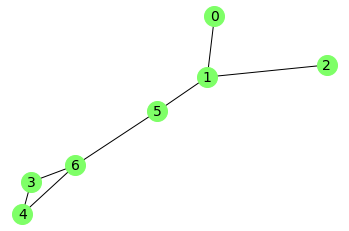

In [13]:
G = nx.Graph()
G.add_edge(0, 1,weight=2.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(1, 5,weight=6.0)
G.add_edge(3, 6,weight=7.0)
G.add_edge(4, 6,weight=2.0)
G.add_edge(5, 6,weight=2.0)
draw_graph(G)

These are the weights of the edges between two vertices.

In [14]:
for i in list(G.edges(data=True)):
    print(i)

(0, 1, {'weight': 2.0})
(1, 2, {'weight': 1.0})
(1, 5, {'weight': 6.0})
(3, 4, {'weight': 4.0})
(3, 6, {'weight': 7.0})
(4, 6, {'weight': 2.0})
(5, 6, {'weight': 2.0})


Here is our matrix. As stated above, this is a symmetrical matrix along the diagonal because the graph is undirected.

In [15]:
A = nx.to_numpy_array(G)
print(A)

[[0. 2. 0. 0. 0. 0. 0.]
 [2. 0. 1. 0. 0. 6. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 7.]
 [0. 0. 0. 4. 0. 0. 2.]
 [0. 6. 0. 0. 0. 0. 2.]
 [0. 0. 0. 7. 2. 2. 0.]]


### Results

In [16]:
dijkstra_matrix(A, 0)

array([{'node': 0, 'dist': 0, 'prev': None},
       {'node': 1, 'dist': 2.0, 'prev': 0},
       {'node': 2, 'dist': 3.0, 'prev': 1},
       {'node': 3, 'dist': 16.0, 'prev': 4},
       {'node': 4, 'dist': 12.0, 'prev': 6},
       {'node': 5, 'dist': 8.0, 'prev': 1},
       {'node': 6, 'dist': 10.0, 'prev': 5}], dtype=object)

## Directed Graph with Initialized Weights

In this directed graph, weights have been initialized for each path. 

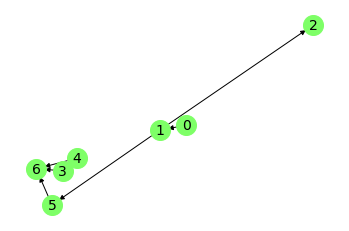

In [17]:
G = nx.DiGraph()
G.add_edge(0, 1,weight=3.0)
G.add_edge(1, 2,weight=1.0)
G.add_edge(3, 4,weight=4.0)
G.add_edge(1, 5,weight=2.0)
G.add_edge(3, 6,weight=8.0)
G.add_edge(4, 6,weight=3.0)
G.add_edge(5, 6,weight=2.0)
draw_graph(G)


<Here are the weights for the edges in the directed graph. 

In [18]:
for i in list(G.edges(data=True)):
    print(i)

(0, 1, {'weight': 3.0})
(1, 2, {'weight': 1.0})
(1, 5, {'weight': 2.0})
(3, 4, {'weight': 4.0})
(3, 6, {'weight': 8.0})
(4, 6, {'weight': 3.0})
(5, 6, {'weight': 2.0})


In [19]:
A = nx.to_numpy_array(G)
print(A)

[[0. 3. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 8.]
 [0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0.]]


### Results

In [20]:
dijkstra_matrix(A, 0)

array([{'node': 0, 'dist': 0, 'prev': None},
       {'node': 1, 'dist': 3.0, 'prev': 0},
       {'node': 2, 'dist': 4.0, 'prev': 1},
       {'node': 3, 'dist': inf, 'prev': -1},
       {'node': 4, 'dist': inf, 'prev': -1},
       {'node': 5, 'dist': 5.0, 'prev': 1},
       {'node': 6, 'dist': 7.0, 'prev': 5}], dtype=object)